Points: 100\
Brilliant!

In [ ]:
#!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 8.5 MB/s 
     |████████████████████████████████| 6.8 MB 29.1 MB/s 
     |████████████████████████████████| 5.0 MB 50.0 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 1.7 MB 49.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 57.8 MB/s 
     |████████████████████████████████| 16.5 MB 49.8 MB/s 
     |████████████████████████████████| 141 kB 63.3 MB/s 
     |████████████████████████████████| 25.8 MB 1.2 MB/s 
     |████████████████████████████████| 167 kB 84.9 MB/s 
     |████████████████████████████████| 2.0 MB 44.1 MB/s 
     |████████████████████████████████| 88 kB 7.2 MB/s 
     |████████████████████████████████| 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
pd.set_option('use_inf_as_na', True)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
crash_data = pd.read_csv("/content/drive/My Drive/Datasets/crash_data.csv")

In [ ]:
crash_data.head()

,Unnamed: 0,RET,date,TICKER,vwretx,BIDLO,ASKHI,PRC,VOL
0,27882462,0.041833,20100104,BAC,0.017045,15.12,15.750,15.69,180845100.0
1,27882463,0.032505,20100105,BAC,0.003362,15.70,16.210,16.20,209521200.0
2,27882464,0.011728,20100106,BAC,0.001769,16.03,16.540,16.39,205257900.0
3,27882465,0.032947,20100107,BAC,0.002821,16.51,17.185,16.93,320868400.0
4,27882466,-0.008860,20100108,BAC,0.004161,16.63,17.100,16.78,220104600.0


In [ ]:
crash_data.date = pd.to_datetime(crash_data.date, format='%Y%m%d')
crash_data = crash_data.set_index('date')

In [ ]:
crash_data

,Unnamed: 0,RET,TICKER,vwretx,BIDLO,ASKHI,PRC,VOL
date,,,,,,,,
2010-01-04,27882462,0.041833,BAC,0.017045,15.12000,15.75000,15.69000,180845100.0
2010-01-05,27882463,0.032505,BAC,0.003362,15.70000,16.21000,16.20000,209521200.0
2010-01-06,27882464,0.011728,BAC,0.001769,16.03000,16.54000,16.39000,205257900.0
2010-01-07,27882465,0.032947,BAC,0.002821,16.51000,17.18500,16.93000,320868400.0
2010-01-08,27882466,-0.008860,BAC,0.004161,16.63000,17.10000,16.78000,220104600.0
...,...,...,...,...,...,...,...,...
2019-12-24,7045394,-0.005141,FB,0.000268,205.00000,206.78999,205.12000,6035490.0
2019-12-26,7045395,0.013017,FB,0.004530,205.31000,207.82001,207.78999,9360333.0
2019-12-27,7045396,0.001492,FB,-0.000714,206.58749,208.92999,208.10001,10278335.0


In [ ]:
crash_dataw = crash_data.groupby('TICKER').resample('W').\
              agg({'RET':'mean', 'vwretx':'mean', 'VOL':'mean',
                   'BIDLO':'mean', 'ASKHI':'mean', 'PRC':'mean'})

In [ ]:
crash_dataw = crash_dataw.reset_index()
crash_dataw.dropna(inplace=True)
stocks = crash_dataw.TICKER.unique()

In [ ]:
crash_dataw

,TICKER,date,RET,vwretx,VOL,BIDLO,ASKHI,PRC
0,AAPL,2010-01-10,0.001235,0.005832,18980442.8,210.898000,213.864000,212.383998
1,AAPL,2010-01-17,-0.005719,-0.002080,19772230.6,206.772002,211.152002,208.767994
2,AAPL,2010-01-24,-0.009510,-0.009479,25930885.0,205.277505,212.888450,208.146752
3,AAPL,2010-01-31,-0.005426,-0.003738,52020594.0,198.250202,207.338002,201.650398
4,AAPL,2010-02-07,0.003722,-0.001463,26953208.4,192.304004,197.378002,195.466002
...,...,...,...,...,...,...,...,...
13398,XOM,2019-12-08,0.004058,0.000184,12371989.0,68.199000,68.946000,68.574000
13399,XOM,2019-12-15,-0.000734,0.001344,13958017.0,68.882000,70.160000,69.450000
13400,XOM,2019-12-22,0.002067,0.003199,18338291.4,69.384000,70.239340,69.776000
13401,XOM,2019-12-29,-0.000172,0.001220,9378504.5,69.832525,70.403075,70.082500


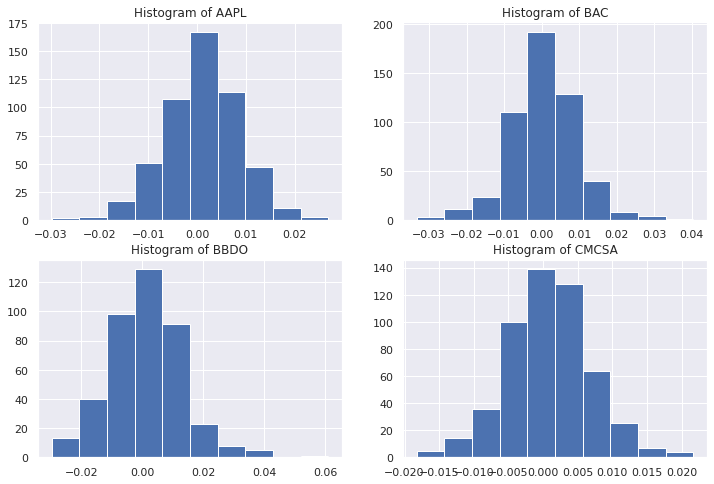

In [ ]:
plt.figure(figsize=(12, 8))
k = 1

for i in stocks[: 4]:
    plt.subplot(2, 2, k)
    plt.hist(crash_dataw[crash_dataw.TICKER == i]['RET'])
    plt.title('Histogram of '+i)
    k+=1
plt.show()

In [ ]:
import statsmodels.api as sm
residuals = []

for i in stocks:
    Y = crash_dataw.loc[crash_dataw['TICKER'] == i]['RET'].values
    X = crash_dataw.loc[crash_dataw['TICKER'] == i]['vwretx'].values
    X = sm.add_constant(X)
    ols = sm.OLS(Y[2:-2], X[2:-2] + X[1:-3] + X[0:-4] + \
                 X[3:-1] + X[4:]).fit()
    residuals.append(ols.resid)

In [ ]:
residuals = list(map(lambda x: np.log(1 + x), residuals))

In [ ]:
crash_data_sliced = pd.DataFrame([])
for i in stocks:
    crash_data_sliced = crash_data_sliced.append(crash_dataw.loc[crash_dataw.TICKER == i]
                               [2:-2])
crash_data_sliced.head()

,TICKER,date,RET,vwretx,VOL,BIDLO,ASKHI,PRC
2,AAPL,2010-01-24,-0.009510,-0.009479,25930885.00,205.277505,212.888450,208.146752
3,AAPL,2010-01-31,-0.005426,-0.003738,52020594.00,198.250202,207.338002,201.650398
4,AAPL,2010-02-07,0.003722,-0.001463,26953208.40,192.304004,197.378002,195.466002
5,AAPL,2010-02-14,0.005031,0.002970,19731018.60,194.513998,198.674002,196.895200
6,AAPL,2010-02-21,0.001640,0.007700,16618997.25,201.102500,203.772500,202.636995


In [ ]:
len(crash_data_sliced)

13286

In [ ]:
crash_data_sliced.set_index('date', drop=True, inplace=True)

In [ ]:
crash_data_sliced

,TICKER,RET,vwretx,VOL,BIDLO,ASKHI,PRC
date,,,,,,,
2010-01-24,AAPL,-0.009510,-0.009479,25930885.00,205.277505,212.888450,208.146752
2010-01-31,AAPL,-0.005426,-0.003738,52020594.00,198.250202,207.338002,201.650398
2010-02-07,AAPL,0.003722,-0.001463,26953208.40,192.304004,197.378002,195.466002
2010-02-14,AAPL,0.005031,0.002970,19731018.60,194.513998,198.674002,196.895200
2010-02-21,AAPL,0.001640,0.007700,16618997.25,201.102500,203.772500,202.636995
...,...,...,...,...,...,...,...
2019-11-24,XOM,0.000599,-0.000558,13173847.80,68.130000,69.170000,68.682000
2019-12-01,XOM,-0.004494,0.002656,10627594.50,68.388325,69.023750,68.620000
2019-12-08,XOM,0.004058,0.000184,12371989.00,68.199000,68.946000,68.574000


In [ ]:
## CHoosing AAPL as my stock of choice

In [ ]:
m=crash_data_sliced[crash_data_sliced['TICKER']=='AAPL']
m

,TICKER,RET,vwretx,VOL,BIDLO,ASKHI,PRC
date,,,,,,,
2010-01-24,AAPL,-0.009510,-0.009479,25930885.00,205.277505,212.888450,208.146752
2010-01-31,AAPL,-0.005426,-0.003738,52020594.00,198.250202,207.338002,201.650398
2010-02-07,AAPL,0.003722,-0.001463,26953208.40,192.304004,197.378002,195.466002
2010-02-14,AAPL,0.005031,0.002970,19731018.60,194.513998,198.674002,196.895200
2010-02-21,AAPL,0.001640,0.007700,16618997.25,201.102500,203.772500,202.636995
...,...,...,...,...,...,...,...
2019-11-24,AAPL,-0.002999,-0.000558,22815242.60,262.408520,265.739598,264.074006
2019-12-01,AAPL,0.005239,0.002656,18848249.75,264.057495,267.395003,266.437502
2019-12-08,AAPL,0.002684,0.000184,23032943.00,262.090002,265.596002,264.327996


In [ ]:
pip install numpy==1.18

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.6 MB 22.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.3.0 requires numpy>=1.19, but you have numpy 1.18.0 which is incompatible.
tifffile 2022.10.10 requires numpy>=1.19.2, but you have numpy 1.18.0 which is incompatible.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.18.0 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.18.0 which is incompatible.
pyod 1.0.6 requires numpy>=1.19, but you have numpy 1.18.0 which is incompatible.
plotnine 0.8.0 requires numpy>=1.19.0, but you have numpy 1.18.0 which is incompatible.
kapre 0.3.7 requires numpy>=1.18.5, but you have numpy 1.18.0 which is incompatible.
jaxlib 0.3.25+cuda11.cudnn805 requires numpy>=1.20, 

In [ ]:
# init setup
from pycaret.anomaly import *
s = setup(m, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(518, 7)"
2,Missing Values,False
3,Numeric Features,6
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(518, 7)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

In [ ]:
iforest = create_model('iforest', fraction = 0.1)
iforest_results = assign_model(iforest)
iforest_results.head()

INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=-1, random_state=123,
    verbose=0)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=-1, random_state=123,
    verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : Isolation Forest
INFO:logs:Copying data
INFO:logs:(518, 9)
INFO:logs:assign_model() succesfully completed......................................


,TICKER,RET,vwretx,VOL,BIDLO,ASKHI,PRC,Anomaly,Anomaly_Score
date,,,,,,,,,
2010-01-24,AAPL,-0.009510,-0.009479,25930885.00,205.277505,212.888450,208.146752,0,-0.051007
2010-01-31,AAPL,-0.005426,-0.003738,52020594.00,198.250202,207.338002,201.650398,0,-0.028954
2010-02-07,AAPL,0.003722,-0.001463,26953208.40,192.304004,197.378002,195.466002,0,-0.115302
2010-02-14,AAPL,0.005031,0.002970,19731018.60,194.513998,198.674002,196.895200,0,-0.115704
2010-02-21,AAPL,0.001640,0.007700,16618997.25,201.102500,203.772500,202.636995,0,-0.077694


In [ ]:
iforest_results[iforest_results['Anomaly'] == 1].head()

,TICKER,RET,vwretx,VOL,BIDLO,ASKHI,PRC,Anomaly,Anomaly_Score
date,,,,,,,,,
2010-05-09,AAPL,-0.019858,-0.014106,37085276.6,238.564002,258.826006,252.625000,1,0.052673
2011-01-23,AAPL,-0.015969,-0.003188,41916034.5,329.907500,341.635627,334.722495,1,0.037927
2011-08-07,AAPL,-0.008590,-0.015974,30006757.0,380.576004,393.153998,385.844002,1,0.039140
2011-09-25,AAPL,0.002035,-0.014674,27397047.0,402.988904,414.848000,408.668004,1,0.029072
2011-10-16,AAPL,0.026884,0.012337,19723523.0,397.594000,406.333996,404.344000,1,0.044504


In [ ]:
iforest_anomaly=iforest_results[iforest_results['Anomaly']==1]
iforest_anomaly.shape

(52, 9)

In [ ]:
anomaly=iforest_results.loc[iforest_results['Anomaly']==1]
anomaly_index=list(iforest_results.index)
print(anomaly)

           TICKER       RET    vwretx           VOL       BIDLO       ASKHI  \
date                                                                          
2010-05-09   AAPL -0.019858 -0.014106  3.708528e+07  238.564002  258.826006   
2011-01-23   AAPL -0.015969 -0.003188  4.191603e+07  329.907500  341.635627   
2011-08-07   AAPL -0.008590 -0.015974  3.000676e+07  380.576004  393.153998   
2011-09-25   AAPL  0.002035 -0.014674  2.739705e+07  402.988904  414.848000   
2011-10-16   AAPL  0.026884  0.012337  1.972352e+07  397.594000  406.333996   
2011-12-04   AAPL  0.014085  0.014780  1.396979e+07  377.631996  384.091180   
2012-03-18   AAPL  0.014541  0.003921  3.318321e+07  566.940002  580.821996   
2012-04-08   AAPL  0.014038 -0.002390  2.448206e+07  615.822508  627.875000   
2012-04-15   AAPL -0.009085 -0.003683  2.715643e+07  619.730444  635.348012   
2012-04-22   AAPL -0.010341  0.001444  3.651740e+07  581.561998  607.976404   
2012-04-29   AAPL  0.011006  0.003582  2.925087e+07 

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
# plot value on y-axis and date on x-axis
fig = px.line(iforest_results, x=iforest_results.index, y="RET", title='Isolation Forest AAPL - ANOMALY DETECTION', template = 'plotly_dark')
# create list of outlier_dates
outlier_dates = iforest_results[iforest_results['Anomaly'] == 1].index
# obtain y value of anomalies to plot
y_values = [iforest_results.loc[i]['RET'] for i in outlier_dates]
fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers', 
                name = 'Anomaly', 
                marker=dict(color='red',size=10)))
        
fig.show()

In [ ]:
knn = create_model('knn')
print(knn)

INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)
INFO:logs:create_model() succesfully completed......................................


KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)


In [ ]:
knn_results = assign_model(knn)
knn_results.head()

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Nearest Neighbors Detector
INFO:logs:Copying data
INFO:logs:(518, 9)
INFO:logs:assign_model() succesfully completed......................................


,TICKER,RET,vwretx,VOL,BIDLO,ASKHI,PRC,Anomaly,Anomaly_Score
date,,,,,,,,,
2010-01-24,AAPL,-0.009510,-0.009479,25930885.00,205.277505,212.888450,208.146752,0,1.559556e+05
2010-01-31,AAPL,-0.005426,-0.003738,52020594.00,198.250202,207.338002,201.650398,0,1.314092e+06
2010-02-07,AAPL,0.003722,-0.001463,26953208.40,192.304004,197.378002,195.466002,0,3.529360e+05
2010-02-14,AAPL,0.005031,0.002970,19731018.60,194.513998,198.674002,196.895200,0,1.277120e+05
2010-02-21,AAPL,0.001640,0.007700,16618997.25,201.102500,203.772500,202.636995,0,2.373111e+05


In [ ]:
knn_anomaly=knn_results[knn_results['Anomaly']==1]
knn_anomaly.shape

(26, 9)

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
# plot value on y-axis and date on x-axis
fig = px.line(knn_results, x=knn_results.index, y="RET", title='K Nearest Forest AAPL - ANOMALY DETECTION', template = 'plotly_dark')
# create list of outlier_dates
outlier_dates = knn_results[knn_results['Anomaly'] == 1].index
# obtain y value of anomalies to plot
y_values = [knn_results.loc[i]['RET'] for i in outlier_dates]
fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers', 
                name = 'Anomaly', 
                marker=dict(color='red',size=10)))
        
fig.show()

Isolation Forest: 
1. unsupervised machine learning algorithm for anomaly detection 
2. works by isolating outliers in the data
3. Based on Decision Tree algorithm
4. It isolates outliers by randomly selecting a feature from the given set of features.
5. It then randomly selecting a split value between the minimum and maximum values of that feature.
6. This random partitioning of features will produce shorter paths in trees for the anomalous data points, thus distinguishing them from the rest of the data.
7. faster method, and requires less memory compared to other algorithms.
Source: https://towardsdatascience.com/k-nearest-neighbors-knn-for-anomaly-detection-fdf8ee160d13

KNN- 
1. is a supervised approach but for anomaly detection takes an unsupervised approach because there is no actual learning involved
2. It is based upon threshold values
3. k-NN classifies a data point based on how its neighbors are classified
4. for example, f a data point is surrounded by 4 red points and 1 black point, that data point is likely a red point by majority vote. 
5. The k in k -NN is a parameter that refers to the number of nearest neighbors to include in the majority voting process. In the above example, k equals to 5. 
6. For continous data, the values of the nearest neighbors are aggregated. Instead of treating all neighbors equally and taking a simple average, the estimate could be improved by taking a weighted average, where we pay more attention to the values of closer neighbors than those further away, since closer neighbors are more likely to reflect a data point’s true value.
Source: https://algobeans.com/2016/09/14/k-nearest-neighbors-anomaly-detection-tutorial/

In my analysis I found, that the number of outlier in our data are 52 (IForest) and 26 (KNN) out 518 datapoints.
In general, for big data Isolation forest is considered better than KNN because 
1. it is the fastest performing algorithm
2. KNN scaled terribly with more observations.
Source: https://towardsdatascience.com/isolation-forest-is-the-best-anomaly-detection-algorithm-for-big-data-right-now-e1a18ec0f94f